In [9]:
#F:\MachineLearningProjects\insurance.csv  https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

In [10]:
data = pd.read_csv("F:\MachineLearningProjects\insurance.csv")

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
data.shape

(1338, 7)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [15]:
data.isnull().sum().sum()

0

Cate Features<br>
Sex<br>
Smoker<br>
region<br>

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'age distribution')

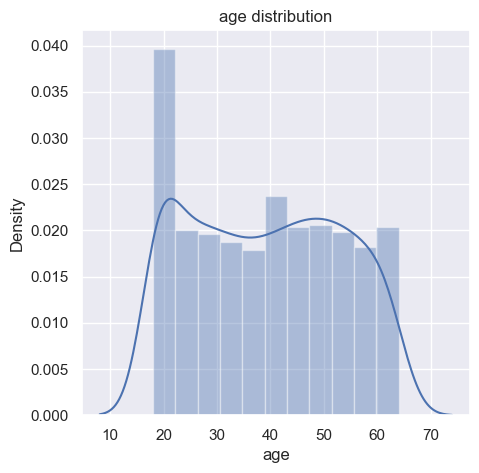

In [16]:
# distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['age'])
plt.title('age distribution')

<AxesSubplot:xlabel='sex', ylabel='count'>

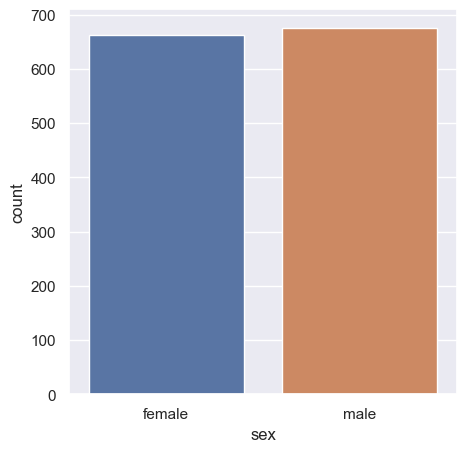

In [17]:
# Gender Coloumn
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=data)

In [19]:
data.sex.value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'age distribution')

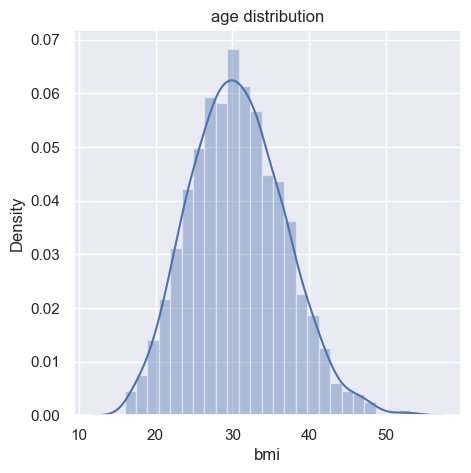

In [20]:
#bmi distribution
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['bmi'])
plt.title('age distribution')

normal bmi-> 18.5 to 29.9

<AxesSubplot:xlabel='children', ylabel='count'>

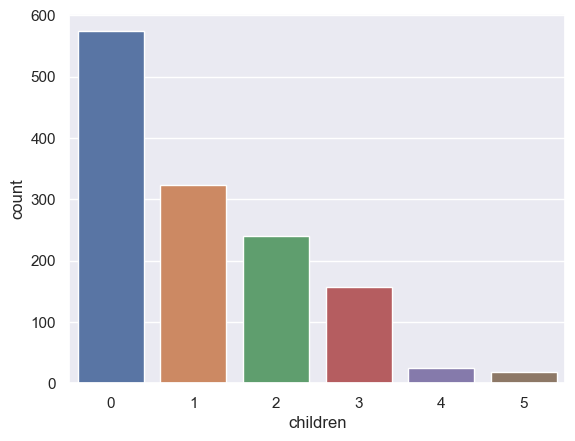

In [21]:
sns.countplot(x='children',data=data)

In [22]:
data.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<AxesSubplot:xlabel='smoker', ylabel='count'>

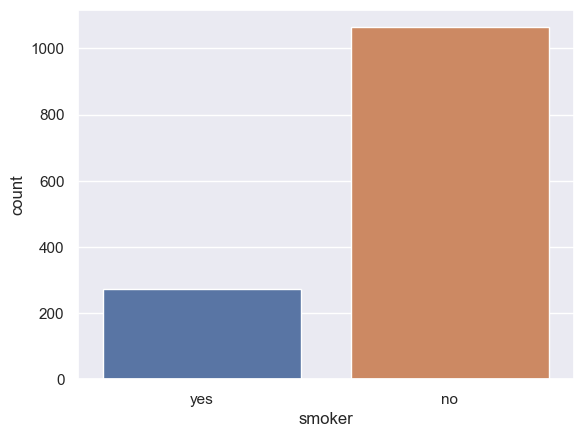

In [24]:
sns.countplot(x='smoker',data=data)

In [25]:
data.smoker.value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<AxesSubplot:xlabel='region', ylabel='count'>

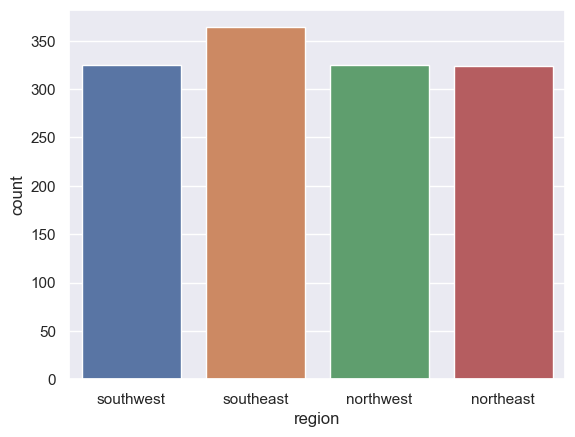

In [26]:
sns.countplot(x='region',data=data)

In [27]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

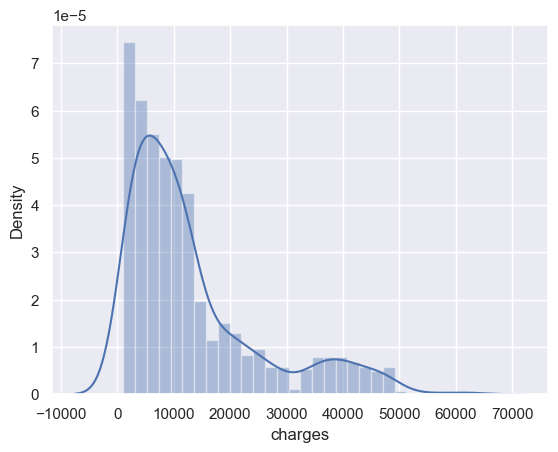

In [28]:
sns.distplot(data['charges'])

### Pre-Processing Cat data
By Using OrdinalEncoder

In [29]:
# ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

In [30]:
ord = OrdinalEncoder()

In [31]:
data1 = data.copy()

In [35]:
features = ['sex','smoker','region']

In [41]:
d1 = data1[features] 

In [42]:
data1[features] = ord.fit_transform(d1)

In [51]:
data1[features]=data1[features].astype(int)

In [79]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [54]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [55]:
# Splititng X and Y

In [61]:
X = data1.drop('charges',axis=1)

In [62]:
y= data1.charges

In [63]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [64]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [65]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [66]:
model = LinearRegression()

In [67]:
model.fit(X_train,y_train)

LinearRegression()

In [68]:
test_pred = model.predict(X_test)

In [69]:
train_pred = model.predict(X_train)

In [73]:
print('R2 score for test case',r2_score(y_test,test_pred))
print('R2 score for train case',r2_score(y_train,train_pred))

R2 score for test case 0.7623224022563391
R2 score for train case 0.7475615631933097


In [74]:
# standard scaler

In [78]:
data1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# testing model

In [88]:
inp = (19,0,27,0,1,3)


In [89]:
inp_np = np.asarray(inp)

In [90]:
inputdata = inp_np.reshape(1,-1)

In [91]:
model.predict(inputdata)

C:\Users\hi\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([24974.46544012])